# FLIP ROBO TECHNOLOGIES


# NAME: BIJAY PAREEK


# BATCH NO: DS2308


# Projects Evaluation Phase 2:

# Loan Application Status Prediction

## Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

## Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

## You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

## Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv



# import necessary libraries:

In [1]:
print("Note here i have import all the necessary libary for the dataset--------------")

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

Note here i have import all the necessary libary for the dataset--------------


In [2]:
df = pd.read_csv(r'C:/Users/raj/Downloads/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
print("Here are the totals columns name in the dataset ------")
df.columns

Here are the totals columns name in the dataset ------


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
print("Here are the total rows and columns in the dataset............")
df.shape

Here are the total rows and columns in the dataset............


(614, 13)

#  Explore the Dataset:

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Note: i can say as per my observation  that the data has nan, outliers, skewness and now we have to removed all of them

# Now we will drop the unnecessary columns :

In [7]:
df.drop('Loan_ID',axis=1,inplace=True)

# now we will see the nan present in the dataset:

In [8]:
print("Here we can see the all missing value in the dataset-----------")

df.isnull().sum()

Here we can see the all missing value in the dataset-----------


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Note: as we can see the nan now we are going to remove the nan using the [dropna]:

In [9]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Note:  i can say as the dataset has the numerical and categorical columns we have have to fill nan accordingly:

# Handle missing values with mean for numerical columns:

In [10]:
print("Here are all the numerical columns ---------")

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

Here are all the numerical columns ---------


# Handle missing values with mode for categorical columns:

In [11]:
print('Here are all the categorical columns------')

categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

Here are all the categorical columns------


## now we will see the nan for checking thus it sucessfully apply or not:

In [12]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encoding categorical data:

In [13]:
print('Here we will keep the the categorical data from the main dataset------')

category = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
category

Here we will keep the the categorical data from the main dataset------


['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# Note: As we keep the categorical data from the dataset and we kept it into new variable named as category and we will use labelencoder :

In [14]:
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Now we will see the outliers in the dataset:

In [15]:
print('Here we will use the all the dataset and kept in the new variable for detection of outliers------ ')

cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
cols

Here we will use the all the dataset and kept in the new variable for detection of outliers------ 


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

# now using boxplot  we can see the outliers:

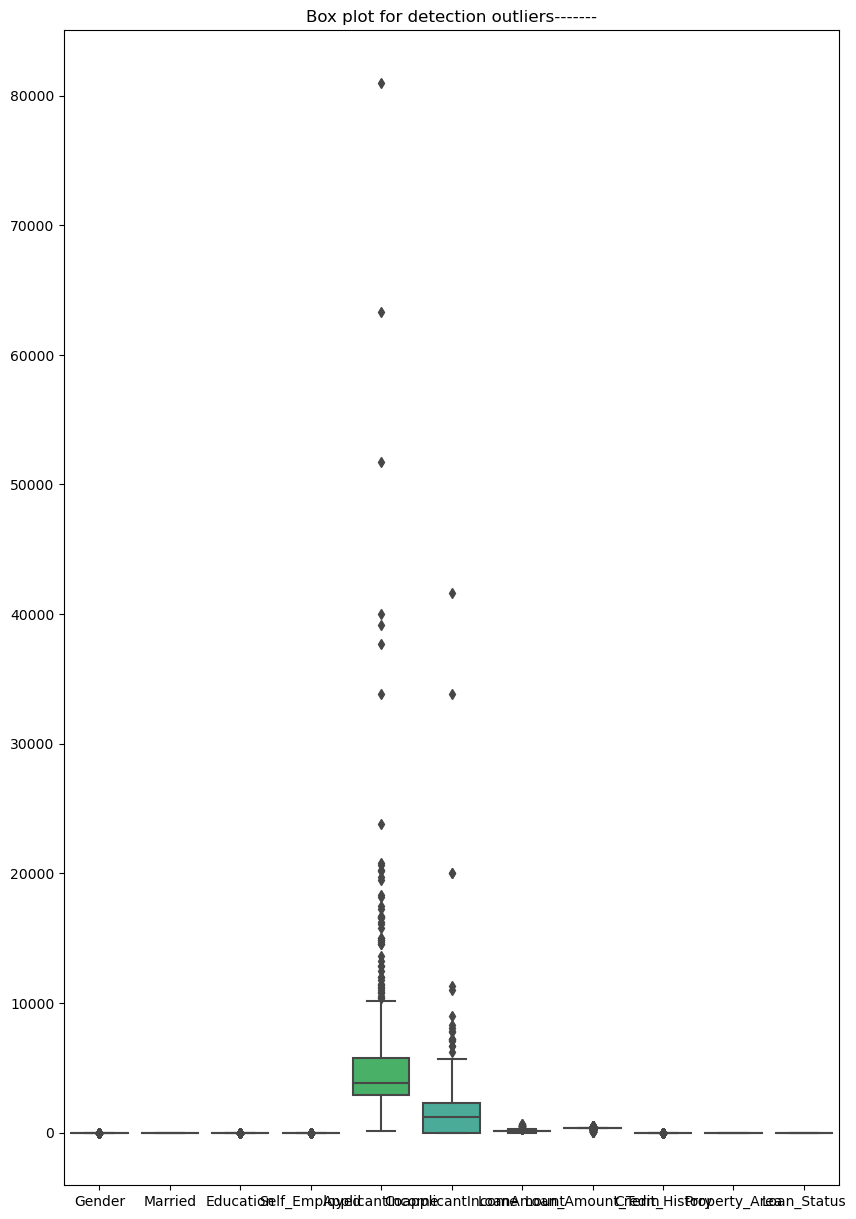

In [16]:
plt.figure(figsize=(10,15))
sns.boxplot(data=df[cols],orient = "r")
plt.title("Box plot for detection outliers-------")
plt.show()

# Note: thus we can see the outliers now we have to remove the outliers :

### Note: we can see outliers in the dataset and we have to remove the outliers:

In [17]:
def remove_outliers(df, columns):
    for column in columns:
        # Calculate the IQR for each column
        Q1 = df[cols].quantile(0.25)
        Q3 = df[cols].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[cols] >= lower_bound) & (df[cols] <= upper_bound)]

    return df

In [18]:
df_without_outliers = remove_outliers(df, cols)

print("Here is the df_without_outliers")
df_without_outliers

Here is the df_without_outliers


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0,NaN,0.0,0.0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,1.0,1,NaN,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1,NaN,0.0,NaN,3000.0,0.0,66.000000,360.0,1.0,2,1
3,1.0,1,NaN,NaN,0.0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0,NaN,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,NaN,0,NaN,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,0,1
610,1.0,1,NaN,0.0,0.0,4106.0,0.0,40.000000,NaN,1.0,0,1
611,1.0,1,NaN,0.0,0.0,NaN,240.0,NaN,360.0,1.0,2,1
612,1.0,1,NaN,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,2,1


Here we see the dataset after removing the outliers


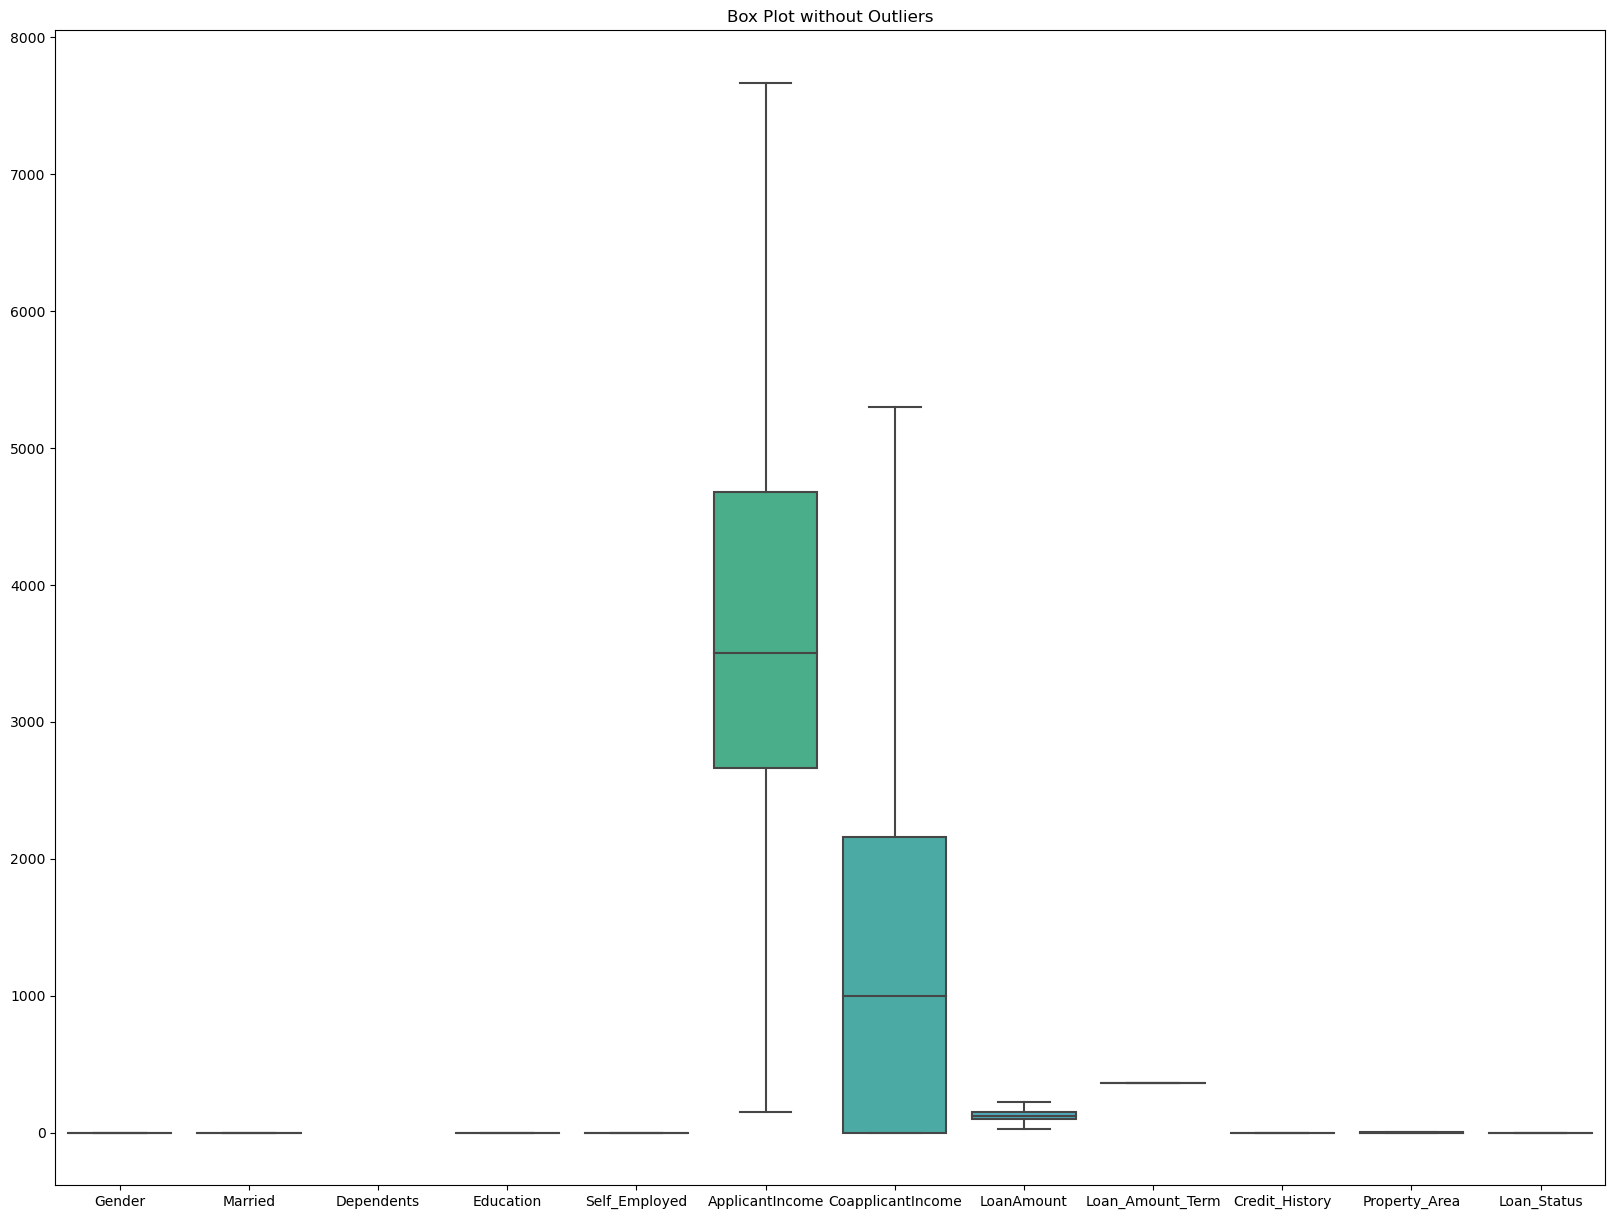

In [19]:
print("Here we see the dataset after removing the outliers")
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_without_outliers[cols], orient='v')
plt.title('Box Plot without Outliers')
plt.show()

## Thus we removed the outliers and now we can go for further analysis:

# Skewness of features:

In [20]:
df.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [21]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
print('Here we kept all the numerical data columns from the main dataset---------')

Numerical = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
Numerical

Here we kept all the numerical data columns from the main dataset---------


['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

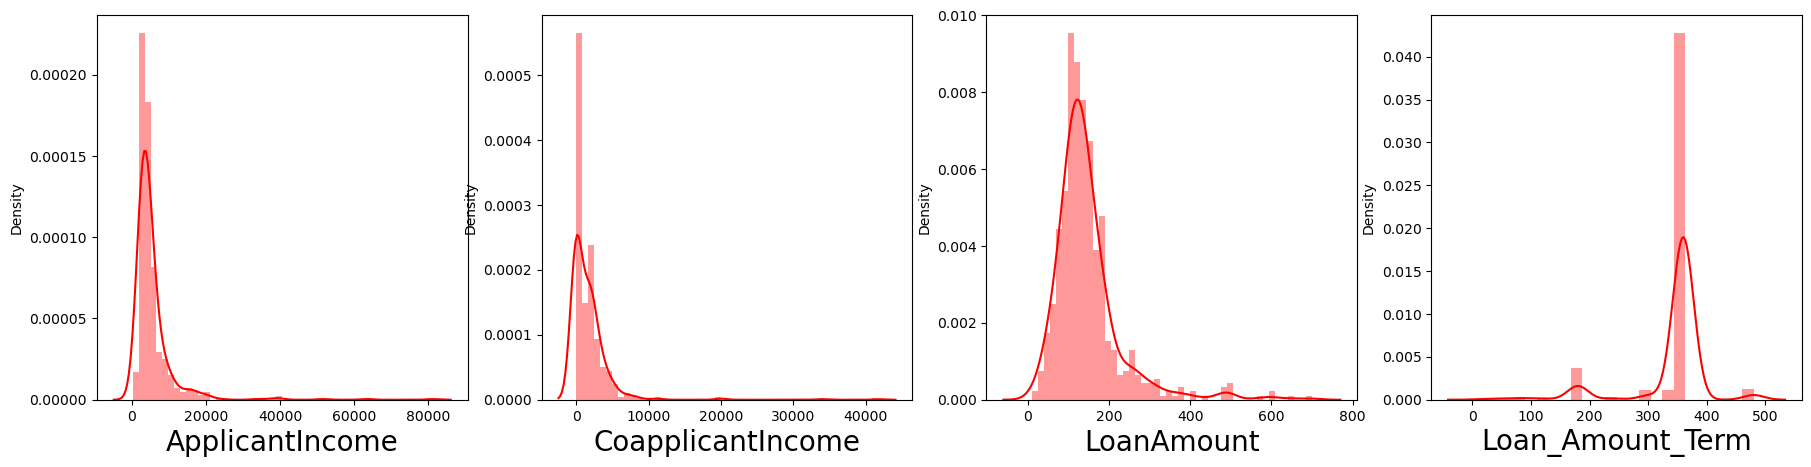

In [23]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [24]:
df.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

### Note: Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.

Other features are categorical in nature so skewness is nothing to do with these remaining feature we will ignore them.

We used the yeo-johnson transformation method.

# Removing skewness using yeo-johnson  method to get better prediction:

In [25]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [26]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.544331,-1.102837,0.235387
1,0.170974,0.750578,-0.037659
2,-0.499955,-1.102837,-1.346305
3,-0.743873,0.891686,-0.167886
4,0.582817,-1.102837,0.158610


## Checking skewness after using yeo-johnson method:

In [27]:
df.skew()

Gender              -1.648795
Married             -0.644850
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

### For Numerical variable skewness is within permissible limit.

### So Yes To Go Forward !!!

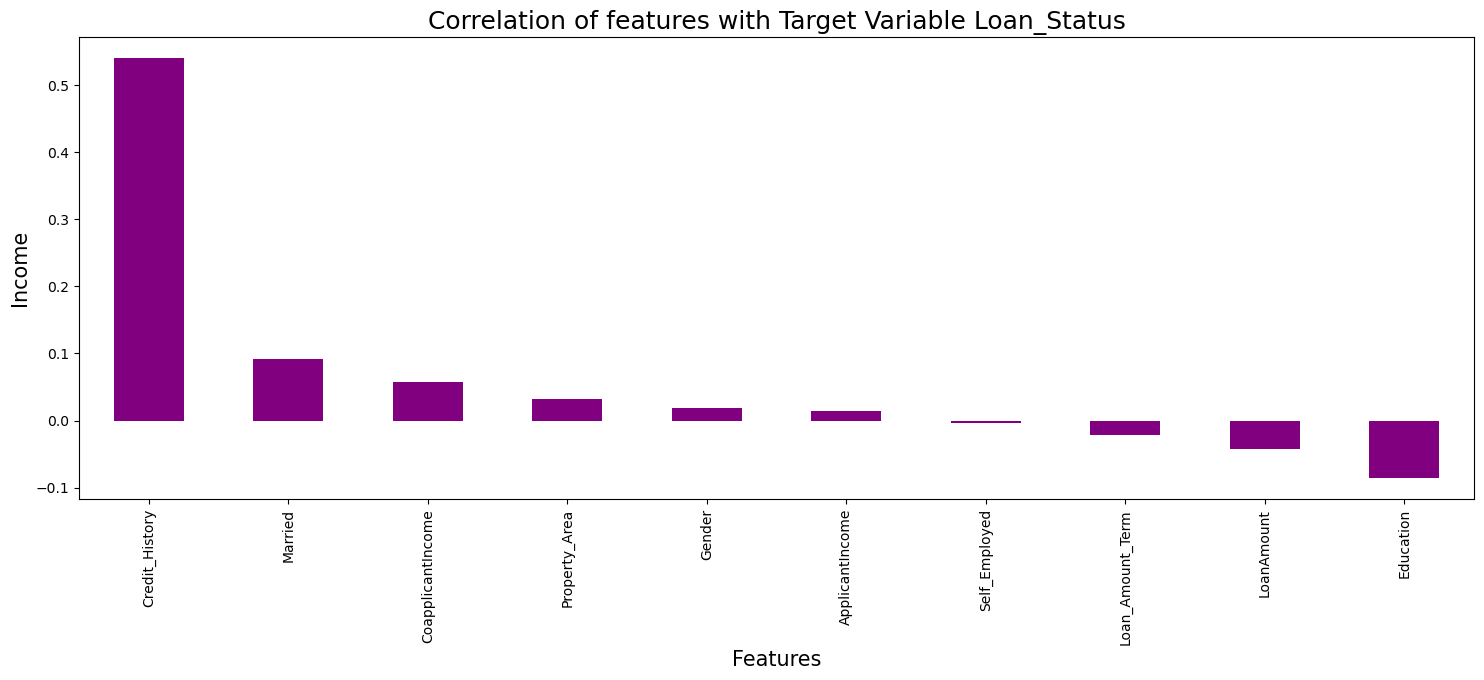

In [28]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

Observation:
Most of feature are poorly or moderately correlated with target variable expect Credit History.

Maximum correlation of 0.561 exist between Credit History and Loan status.

# visualisation:

# Pairplot for numerical variables:

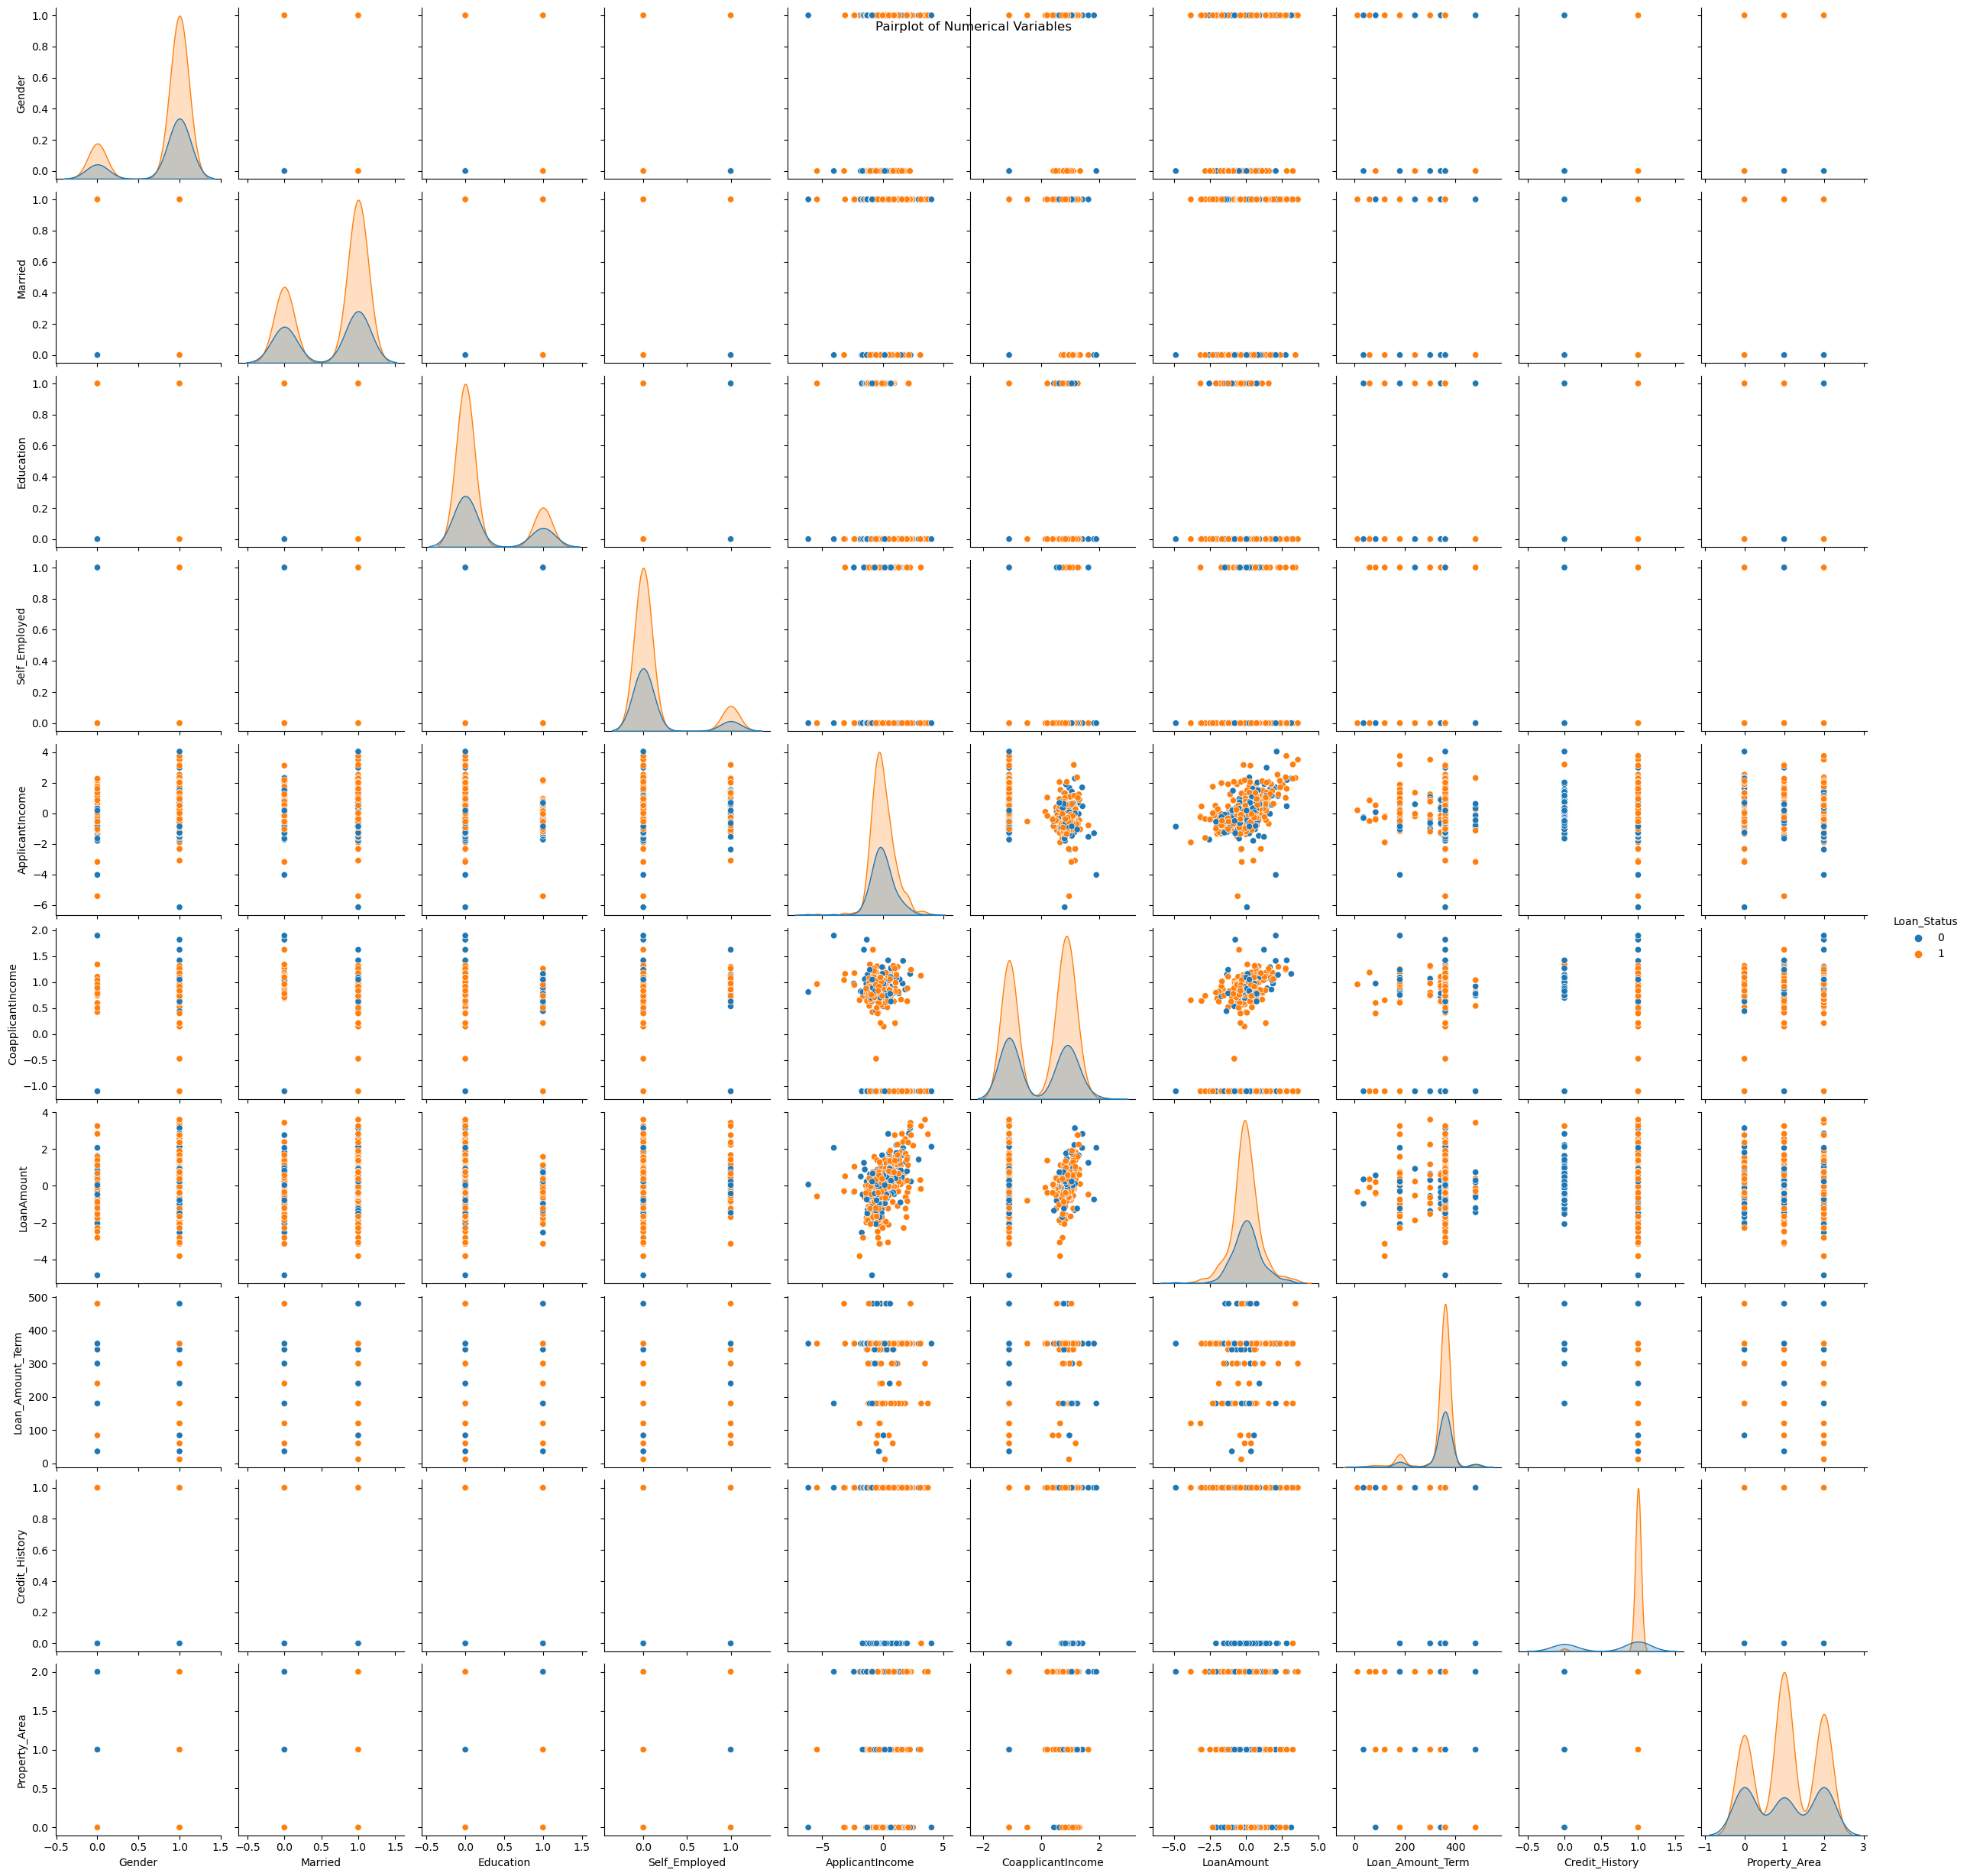

In [29]:
sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
plt.suptitle("Pairplot of Numerical Variables")
plt.show()


# Countplot for categorical variables:

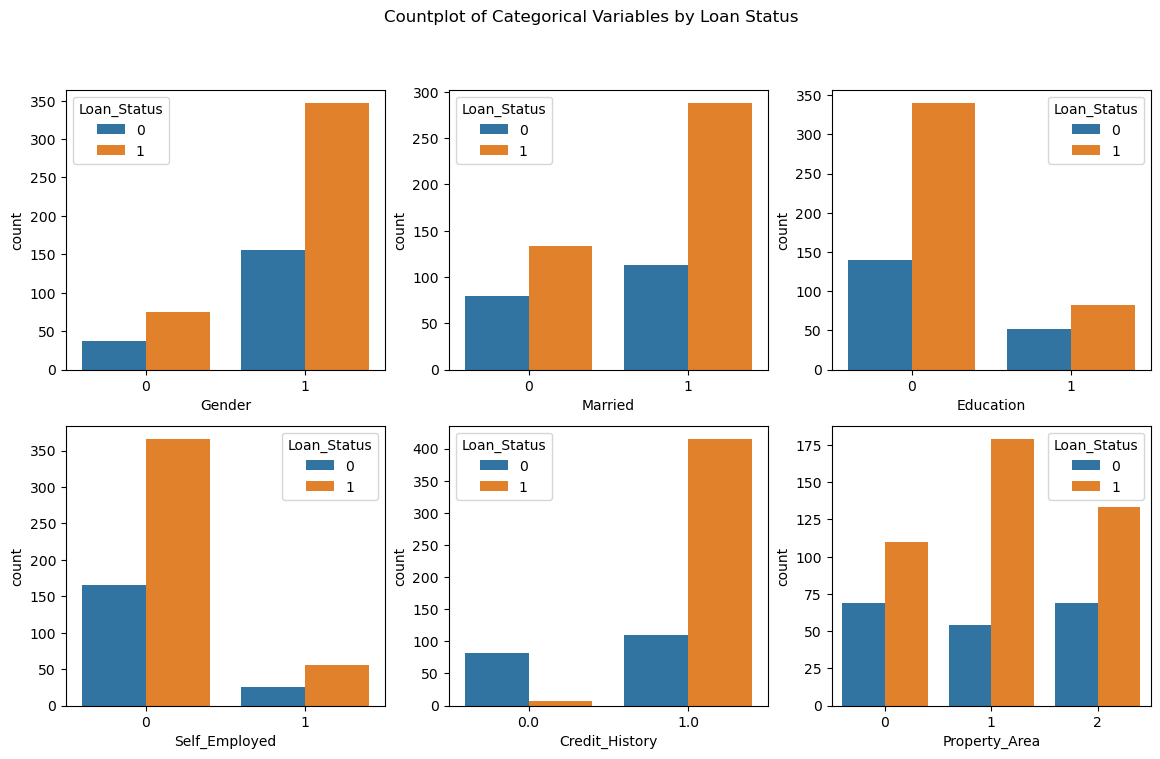

In [30]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', hue='Loan_Status', data=df)
plt.subplot(2, 3, 2)
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.subplot(2, 3, 3)
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.subplot(2, 3, 4)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.subplot(2, 3, 5)
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.subplot(2, 3, 6)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.suptitle("Countplot of Categorical Variables by Loan Status")
plt.show()

# Correlation matrix heatmap:

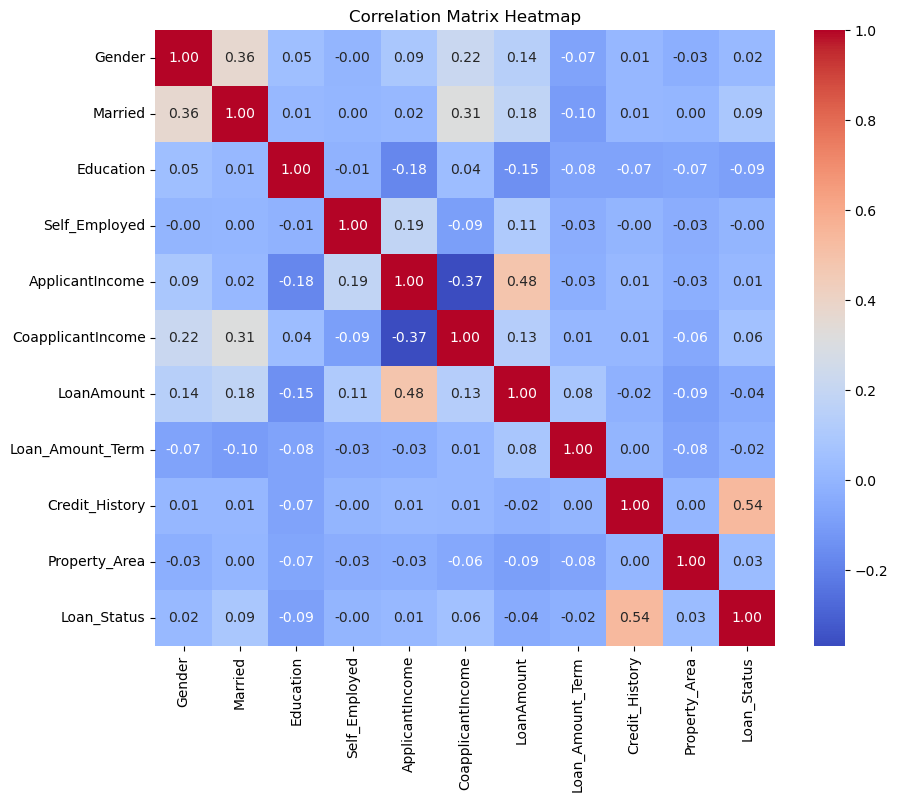

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Now we will use the Splitting data in target and dependent feature:

In [32]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [33]:
print("Here are the feature of the dataset-----------------")
X

Here are the feature of the dataset-----------------


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.544331,-1.102837,0.235387,360.0,1.0,2
1,1,1,1,0,0,0.170974,0.750578,-0.037659,360.0,1.0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,360.0,1.0,2
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,360.0,1.0,2
4,1,0,0,0,0,0.582817,-1.102837,0.158610,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.554885,-1.102837,-1.205100,360.0,1.0,0
610,1,1,3+,0,0,-0.000290,-1.102837,-2.293317,180.0,1.0,0
611,1,1,1,0,0,1.023487,0.208603,1.372409,360.0,1.0,2
612,1,1,2,0,0,0.931750,-1.102837,0.738924,360.0,1.0,2


In [34]:
import numpy as np
X['Dependents'] = X['Dependents'].str.replace('+','').astype('float')

In [35]:
X.dtypes

Gender                 int32
Married                int32
Dependents           float64
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object

In [36]:
print("Here are the label of dataset--------------")
Y

Here are the label of dataset--------------


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

# [Standard Scaling]:

In [37]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_scaled

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.41173269, -1.31851281],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.27985054,
         0.41173269,  1.22329839],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.27985054,
         0.41173269,  1.22329839],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.27985054,
         0.41173269,  1.22329839],
       [-2.11710719, -1.37208932, -0.73780632, ...,  0.27985054,
        -2.42876026, -0.04760721]])

# [train_test_split]:

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=78, test_size=.3)

# [Model building]:

# Logistics Regression Model:

In [40]:
print('Here we build the called the logistics regression model ---------')
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

Here we build the called the logistics regression model ---------


LogisticRegression()

In [41]:
Y_pred=log_reg.predict(X_test)
Y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1])

In [42]:
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('The result of accuracy score = ', accuracy_score(Y_test, Y_pred))
print('\n')
print('The result of confusion_matrix = ',confusion_matrix(Y_test, Y_pred))
print('\n')
print('Here are the classification report = ',classification_report(Y_test, Y_pred))

Logistics Regression Evaluation
The result of accuracy score =  0.8054054054054054


The result of confusion_matrix =  [[ 20  31]
 [  5 129]]


Here are the classification report =                precision    recall  f1-score   support

           0       0.80      0.39      0.53        51
           1       0.81      0.96      0.88       134

    accuracy                           0.81       185
   macro avg       0.80      0.68      0.70       185
weighted avg       0.80      0.81      0.78       185



Classification ML Algorithm Evaluation Matrix SVC() is


The result of accuracy score =  0.8054054054054054


Confusion matrix : 
 [[ 20  31]
 [  5 129]]


The classification report is show below =                precision    recall  f1-score   support

           0       0.80      0.39      0.53        51
           1       0.81      0.96      0.88       134

    accuracy                           0.81       185
   macro avg       0.80      0.68      0.70       185
weighted avg       0.80      0.81      0.78       185





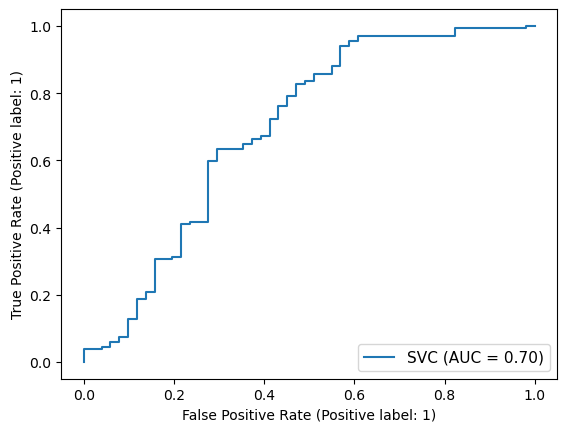

Classification ML Algorithm Evaluation Matrix GaussianNB() is


The result of accuracy score =  0.8108108108108109


Confusion matrix : 
 [[ 20  31]
 [  4 130]]


The classification report is show below =                precision    recall  f1-score   support

           0       0.83      0.39      0.53        51
           1       0.81      0.97      0.88       134

    accuracy                           0.81       185
   macro avg       0.82      0.68      0.71       185
weighted avg       0.81      0.81      0.79       185





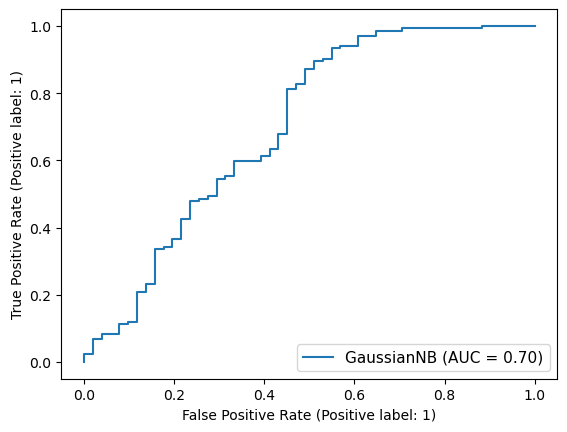

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


The result of accuracy score =  0.6810810810810811


Confusion matrix : 
 [[32 19]
 [40 94]]


The classification report is show below =                precision    recall  f1-score   support

           0       0.44      0.63      0.52        51
           1       0.83      0.70      0.76       134

    accuracy                           0.68       185
   macro avg       0.64      0.66      0.64       185
weighted avg       0.73      0.68      0.69       185





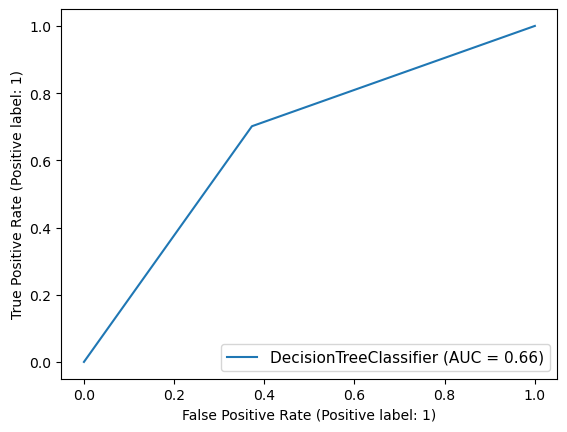

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=3) is


The result of accuracy score =  0.7297297297297297


Confusion matrix : 
 [[ 21  30]
 [ 20 114]]


The classification report is show below =                precision    recall  f1-score   support

           0       0.51      0.41      0.46        51
           1       0.79      0.85      0.82       134

    accuracy                           0.73       185
   macro avg       0.65      0.63      0.64       185
weighted avg       0.71      0.73      0.72       185





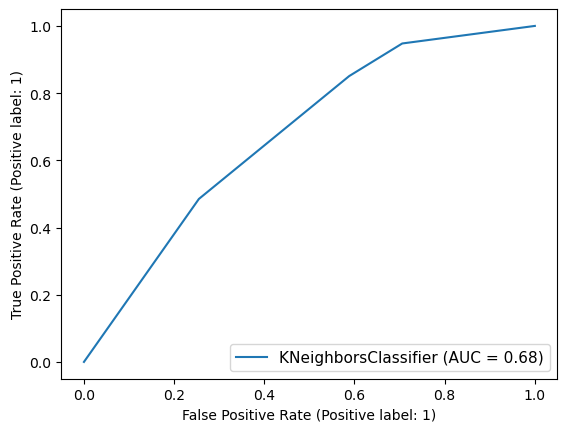

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


The result of accuracy score =  0.7621621621621621


Confusion matrix : 
 [[ 22  29]
 [ 15 119]]


The classification report is show below =                precision    recall  f1-score   support

           0       0.59      0.43      0.50        51
           1       0.80      0.89      0.84       134

    accuracy                           0.76       185
   macro avg       0.70      0.66      0.67       185
weighted avg       0.75      0.76      0.75       185





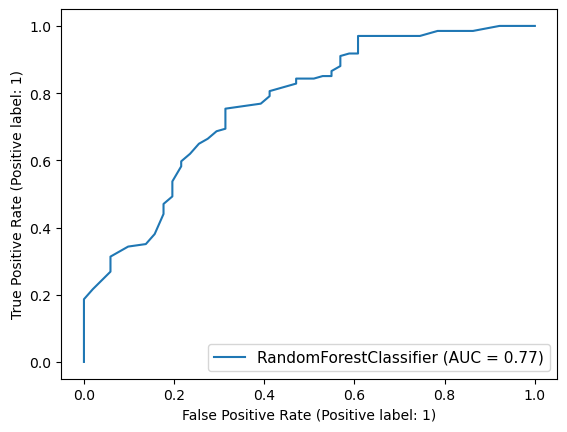

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


The result of accuracy score =  0.7405405405405405


Confusion matrix : 
 [[ 25  26]
 [ 22 112]]


The classification report is show below =                precision    recall  f1-score   support

           0       0.53      0.49      0.51        51
           1       0.81      0.84      0.82       134

    accuracy                           0.74       185
   macro avg       0.67      0.66      0.67       185
weighted avg       0.73      0.74      0.74       185





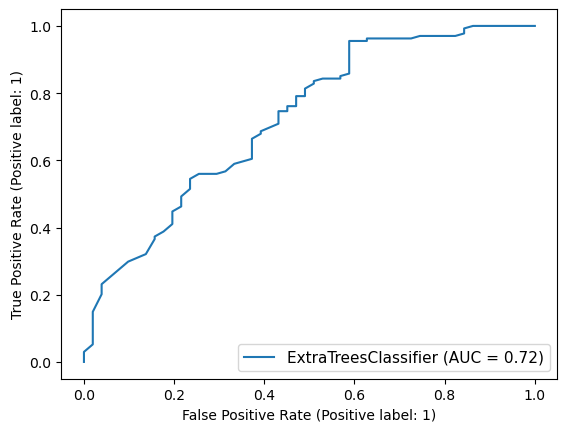

In [43]:
from sklearn.metrics import plot_roc_curve
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('The result of accuracy score = ', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('The classification report is show below = ',classification_report(Y_test, y_pred))
    print('\n')
    
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')


# CrossValidation :

In [44]:
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scaled, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
Mean Score : 0.809462881514061
Std deviation : 0.027383073694490688




Cross Validation Score SVC() :

Score : [0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
Mean Score : 0.8078368652538984
Std deviation : 0.02923416378093254




Cross Validation Score GaussianNB() :

Score : [0.79674797 0.7804878  0.7804878  0.84552846 0.81967213]
Mean Score : 0.8045848327335733
Std deviation : 0.025007026056597794




Cross Validation Score DecisionTreeClassifier() :

Score : [0.68292683 0.67479675 0.75609756 0.75609756 0.74590164]
Mean Score : 0.7231640677062509
Std deviation : 0.036454519877966135




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.76422764 0.75609756 0.72357724 0.78861789 0.71311475]
Mean Score : 0.7491270158603226
Std deviation : 0.02751661503758768




Cross Validation Score RandomForestClassifier() :

Score : [0.80487805 0.7398374

# Hyper Parameter Tuning : GridSearchCV:

In [45]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}
parameter

{'bootstrap': [True],
 'max_depth': [5, 10, 20, 40, 50, 60],
 'max_features': ['auto', 'log2'],
 'criterion': ['gini', 'entropy'],
 'n_estimators': [5, 10, 15, 25, 50, 60, 70]}

In [46]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.814 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.826 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.791 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.756 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [47]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 70}

# Final Model:

In [48]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, Y_pred))

Accuracy Score :
 0.8054054054054054


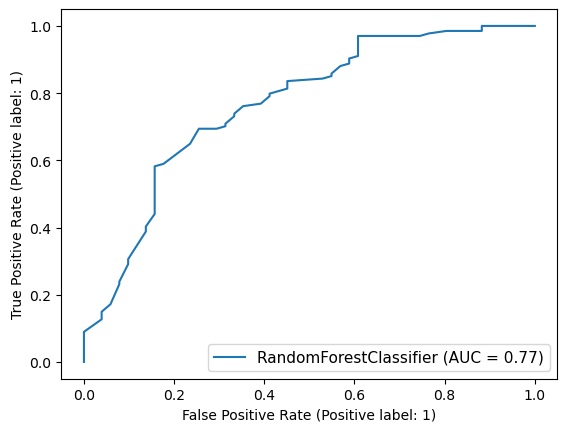

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.6559847819724904


In [49]:
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model:

In [50]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']